# 케라스 보스턴 주택 가격 모델

### modules import

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [5]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path = 'boston_housing.npz',
                                                          test_split = .2,
                                                          seed = 111)

### 데이터 확인

In [6]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


In [7]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [9]:
print(y_train_full[0])

## 25000$

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [10]:
mean = np.mean(x_train_full, axis = 0)
std = np.std(x_train_full, axis = 0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                 test_size = .3,
                                                 random_state = 111)

In [12]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('검증 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [13]:
# 깊이 안하고 적절한 모델링 필요
model = Sequential([Dense(100, activation = 'relu', input_shape = (13, ), name = 'dense1'),
                   Dense(64, activation = 'relu', name = 'dense2'),
                   Dense(32, activation = 'relu', name = 'dense3'),
                   Dense(1, name = 'output')])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 100)               1400      
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


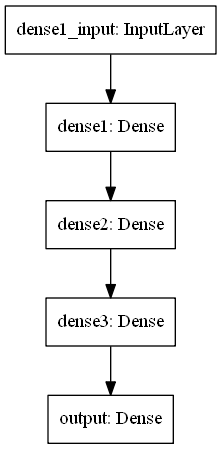

In [15]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [17]:
model.compile(loss = 'mse',
             optimizer = Adam(learning_rate = 1e-4),
             metrics = ['mae'])

## 회귀문제에서 loss값으로 'mse' 주로 사용

### 모델 학습

In [18]:
history = model.fit(x_train, y_train, epochs = 300,
                   validation_data = (x_val, y_val))

Epoch 1/300
9/9 [==============================] - 1s 28ms/step - loss: 551.1935 - mae: 21.7220 - val_loss: 613.7725 - val_mae: 22.7655
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 547.0843 - mae: 21.6304 - val_loss: 609.0735 - val_mae: 22.6702
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 542.8079 - mae: 21.5372 - val_loss: 604.1311 - val_mae: 22.5703
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 538.1675 - mae: 21.4355 - val_loss: 598.9726 - val_mae: 22.4651
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 533.3851 - mae: 21.3281 - val_loss: 593.3971 - val_mae: 22.3512
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 528.1574 - mae: 21.2112 - val_loss: 587.4673 - val_mae: 22.2283
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 522.5861 - mae: 21.0844 - val_loss: 581.1060 - val_mae: 22.0955
Epoch 8/300
9/9 [==============================] - 0s 

9/9 [==============================] - 0s 7ms/step - loss: 39.2509 - mae: 4.6880 - val_loss: 29.0525 - val_mae: 3.9446
Epoch 63/300
9/9 [==============================] - 0s 7ms/step - loss: 37.9931 - mae: 4.6027 - val_loss: 27.9457 - val_mae: 3.8762
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 36.8050 - mae: 4.5198 - val_loss: 26.9875 - val_mae: 3.8116
Epoch 65/300
9/9 [==============================] - 0s 6ms/step - loss: 35.6231 - mae: 4.4366 - val_loss: 26.1744 - val_mae: 3.7559
Epoch 66/300
9/9 [==============================] - 0s 6ms/step - loss: 34.5990 - mae: 4.3655 - val_loss: 25.3563 - val_mae: 3.7031
Epoch 67/300
9/9 [==============================] - 0s 7ms/step - loss: 33.6058 - mae: 4.2928 - val_loss: 24.6112 - val_mae: 3.6528
Epoch 68/300
9/9 [==============================] - 0s 6ms/step - loss: 32.6542 - mae: 4.2219 - val_loss: 23.8916 - val_mae: 3.6073
Epoch 69/300
9/9 [==============================] - 0s 7ms/step - loss: 31.7637 - mae: 4.

Epoch 124/300
9/9 [==============================] - 0s 7ms/step - loss: 16.9228 - mae: 2.8312 - val_loss: 13.8427 - val_mae: 2.9023
Epoch 125/300
9/9 [==============================] - 0s 7ms/step - loss: 16.8224 - mae: 2.8221 - val_loss: 13.8011 - val_mae: 2.8971
Epoch 126/300
9/9 [==============================] - 0s 7ms/step - loss: 16.7387 - mae: 2.8148 - val_loss: 13.7486 - val_mae: 2.8922
Epoch 127/300
9/9 [==============================] - 0s 6ms/step - loss: 16.6642 - mae: 2.8083 - val_loss: 13.6916 - val_mae: 2.8878
Epoch 128/300
9/9 [==============================] - 0s 6ms/step - loss: 16.6129 - mae: 2.8002 - val_loss: 13.6948 - val_mae: 2.8807
Epoch 129/300
9/9 [==============================] - 0s 6ms/step - loss: 16.4749 - mae: 2.7879 - val_loss: 13.6244 - val_mae: 2.8776
Epoch 130/300
9/9 [==============================] - 0s 6ms/step - loss: 16.4019 - mae: 2.7818 - val_loss: 13.5524 - val_mae: 2.8739
Epoch 131/300
9/9 [==============================] - 0s 7ms/step - lo

9/9 [==============================] - 0s 7ms/step - loss: 13.1052 - mae: 2.5018 - val_loss: 11.2884 - val_mae: 2.6239
Epoch 186/300
9/9 [==============================] - 0s 6ms/step - loss: 13.0563 - mae: 2.4965 - val_loss: 11.2433 - val_mae: 2.6171
Epoch 187/300
9/9 [==============================] - 0s 7ms/step - loss: 13.0113 - mae: 2.4904 - val_loss: 11.2073 - val_mae: 2.6131
Epoch 188/300
9/9 [==============================] - 0s 7ms/step - loss: 12.9755 - mae: 2.4873 - val_loss: 11.2104 - val_mae: 2.6100
Epoch 189/300
9/9 [==============================] - 0s 6ms/step - loss: 12.9282 - mae: 2.4805 - val_loss: 11.1623 - val_mae: 2.6042
Epoch 190/300
9/9 [==============================] - 0s 7ms/step - loss: 12.8994 - mae: 2.4813 - val_loss: 11.1095 - val_mae: 2.6045
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 12.8264 - mae: 2.4767 - val_loss: 11.0764 - val_mae: 2.5994
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 12.7958 - 

Epoch 247/300
9/9 [==============================] - 0s 7ms/step - loss: 10.7976 - mae: 2.2722 - val_loss: 9.4341 - val_mae: 2.3634
Epoch 248/300
9/9 [==============================] - 0s 7ms/step - loss: 10.7929 - mae: 2.2696 - val_loss: 9.4020 - val_mae: 2.3560
Epoch 249/300
9/9 [==============================] - 0s 6ms/step - loss: 10.7434 - mae: 2.2637 - val_loss: 9.3965 - val_mae: 2.3555
Epoch 250/300
9/9 [==============================] - 0s 6ms/step - loss: 10.7195 - mae: 2.2660 - val_loss: 9.3701 - val_mae: 2.3540
Epoch 251/300
9/9 [==============================] - 0s 7ms/step - loss: 10.6914 - mae: 2.2629 - val_loss: 9.3823 - val_mae: 2.3527
Epoch 252/300
9/9 [==============================] - 0s 7ms/step - loss: 10.6672 - mae: 2.2601 - val_loss: 9.3349 - val_mae: 2.3484
Epoch 253/300
9/9 [==============================] - 0s 7ms/step - loss: 10.6252 - mae: 2.2571 - val_loss: 9.2918 - val_mae: 2.3413
Epoch 254/300
9/9 [==============================] - 0s 6ms/step - loss: 10.

### 모델 평가 
- `evaluate()`

In [19]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 22.2089 - mae: 3.1243


[22.208860397338867, 3.1243247985839844]

In [20]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


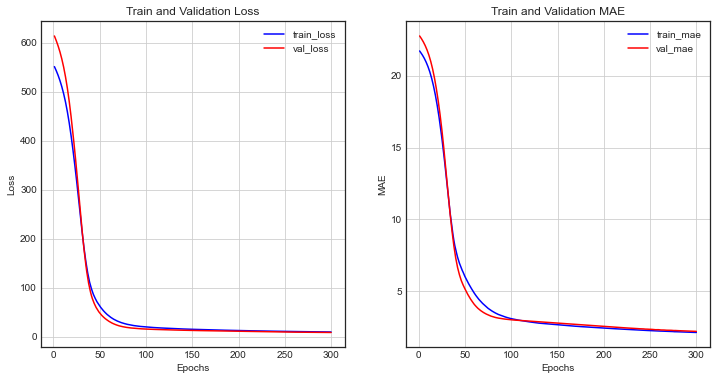

In [22]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (12, 6))

# 왼쪽
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


mae = history_dict['mae']
val_mae = history_dict['val_mae']

# 오른쪽
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'red', label = 'val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [24]:
from sklearn.model_selection import KFold

In [25]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path = 'boston_housing.npz',
                                                          test_split = .2,
                                                          seed = 111)

mean = np.mean(x_train_full, axis = 0)
std = np.std(x_train_full, axis = 0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

In [27]:
k = 3

kfold = KFold(n_splits = k, random_state = 111, shuffle = True)

In [34]:
def build_model():
    input = Input(shape = (13, ), name = 'input')
    hidden1 = Dense(100, activation = 'relu', input_shape = (13, ), name = 'dense1')(input)
    hidden2 = Dense(64, activation = 'relu', name = 'dense2')(hidden1)
    hidden3 = Dense(32, activation = 'relu', name = 'dense3')(hidden2)
    output = Dense(1, name = 'output')(hidden3)
    
    model = Model(inputs = [input], outputs = [output])
    
    model.compile(loss = 'mse',
                 optimizer = 'adam',
                 metrics = ['mae'])
    
    return model

In [36]:
mae_list = []

In [37]:
for train_idx, val_idx in kfold.split(x_train_preprocessed):
    x_train_fold, x_val_fold = x_train_preprocessed[train_idx], x_train_preprocessed[val_idx]
    y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx]
    
    model = build_model()
    
    model.fit(x_train_fold, y_train_fold, epochs = 300,
             validation_data = (x_val_fold, y_val_fold))
    
    _, test_mae = model.evaluate(x_test, y_test)
    mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 0s 15ms/step - loss: 548.5535 - mae: 21.6997 - val_loss: 581.0482 - val_mae: 22.0044
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 509.4408 - mae: 20.7826 - val_loss: 529.5325 - val_mae: 20.8665
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 454.2690 - mae: 19.4424 - val_loss: 448.3071 - val_mae: 18.9475
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 368.1699 - mae: 17.1688 - val_loss: 324.3546 - val_mae: 15.5938
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 242.5972 - mae: 13.5680 - val_loss: 175.0917 - val_mae: 11.0545
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 128.9523 - mae: 9.2865 - val_loss: 70.0593 - val_mae: 6.9124
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 77.6910 - mae: 7.0836 - val_loss: 49.6527 - val_mae: 5.6645
Epoch 8/300
9/9 [==============================] - 0s 6ms/ste

9/9 [==============================] - 0s 6ms/step - loss: 7.9317 - mae: 1.9425 - val_loss: 9.1061 - val_mae: 2.3556
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 7.8317 - mae: 1.9457 - val_loss: 9.0957 - val_mae: 2.3396
Epoch 65/300
9/9 [==============================] - 0s 6ms/step - loss: 7.8196 - mae: 1.9419 - val_loss: 8.7773 - val_mae: 2.3051
Epoch 66/300
9/9 [==============================] - 0s 6ms/step - loss: 7.6835 - mae: 1.9404 - val_loss: 8.9535 - val_mae: 2.3368
Epoch 67/300
9/9 [==============================] - 0s 6ms/step - loss: 7.5101 - mae: 1.9234 - val_loss: 8.9110 - val_mae: 2.3283
Epoch 68/300
9/9 [==============================] - 0s 6ms/step - loss: 7.5560 - mae: 1.9111 - val_loss: 8.8080 - val_mae: 2.2795
Epoch 69/300
9/9 [==============================] - 0s 6ms/step - loss: 7.4728 - mae: 1.9175 - val_loss: 9.2641 - val_mae: 2.3683
Epoch 70/300
9/9 [==============================] - 0s 6ms/step - loss: 7.4019 - mae: 1.9294 - val_loss

Epoch 126/300
9/9 [==============================] - 0s 7ms/step - loss: 3.9855 - mae: 1.4123 - val_loss: 9.6969 - val_mae: 2.4453
Epoch 127/300
9/9 [==============================] - 0s 6ms/step - loss: 4.1444 - mae: 1.4218 - val_loss: 8.4231 - val_mae: 2.2835
Epoch 128/300
9/9 [==============================] - 0s 6ms/step - loss: 3.9180 - mae: 1.4227 - val_loss: 9.2041 - val_mae: 2.3975
Epoch 129/300
9/9 [==============================] - 0s 6ms/step - loss: 3.9499 - mae: 1.4154 - val_loss: 8.8044 - val_mae: 2.3451
Epoch 130/300
9/9 [==============================] - 0s 7ms/step - loss: 4.0647 - mae: 1.4342 - val_loss: 9.2725 - val_mae: 2.3921
Epoch 131/300
9/9 [==============================] - 0s 6ms/step - loss: 3.8906 - mae: 1.4075 - val_loss: 9.1021 - val_mae: 2.3673
Epoch 132/300
9/9 [==============================] - 0s 7ms/step - loss: 3.7783 - mae: 1.3915 - val_loss: 9.0064 - val_mae: 2.3566
Epoch 133/300
9/9 [==============================] - 0s 6ms/step - loss: 3.7246 - m

9/9 [==============================] - 0s 7ms/step - loss: 2.0883 - mae: 1.0071 - val_loss: 10.6895 - val_mae: 2.4336
Epoch 189/300
9/9 [==============================] - 0s 7ms/step - loss: 2.1259 - mae: 1.0178 - val_loss: 10.4533 - val_mae: 2.4135
Epoch 190/300
9/9 [==============================] - 0s 7ms/step - loss: 2.2726 - mae: 1.0953 - val_loss: 10.6588 - val_mae: 2.4280
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 2.0678 - mae: 1.0208 - val_loss: 10.6889 - val_mae: 2.4677
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 2.0185 - mae: 0.9833 - val_loss: 11.2790 - val_mae: 2.4980
Epoch 193/300
9/9 [==============================] - 0s 6ms/step - loss: 1.9739 - mae: 1.0146 - val_loss: 10.2769 - val_mae: 2.4022
Epoch 194/300
9/9 [==============================] - 0s 6ms/step - loss: 1.9311 - mae: 0.9725 - val_loss: 11.1988 - val_mae: 2.4725
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss: 1.9770 - mae: 0.9

9/9 [==============================] - 0s 6ms/step - loss: 1.2537 - mae: 0.7865 - val_loss: 13.4663 - val_mae: 2.6483
Epoch 251/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3135 - mae: 0.8282 - val_loss: 12.3735 - val_mae: 2.6506
Epoch 252/300
9/9 [==============================] - 0s 6ms/step - loss: 1.4631 - mae: 0.8924 - val_loss: 12.6328 - val_mae: 2.5548
Epoch 253/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2777 - mae: 0.7893 - val_loss: 12.5625 - val_mae: 2.5426
Epoch 254/300
9/9 [==============================] - 0s 6ms/step - loss: 1.1492 - mae: 0.7477 - val_loss: 11.6711 - val_mae: 2.5051
Epoch 255/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2503 - mae: 0.7841 - val_loss: 13.6494 - val_mae: 2.6524
Epoch 256/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2633 - mae: 0.8091 - val_loss: 11.0566 - val_mae: 2.4509
Epoch 257/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2166 - mae: 0.7

9/9 [==============================] - 0s 7ms/step - loss: 20.9530 - mae: 3.5321 - val_loss: 29.9299 - val_mae: 3.8582
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 19.2312 - mae: 3.4219 - val_loss: 28.3973 - val_mae: 3.7024
Epoch 13/300
9/9 [==============================] - 0s 6ms/step - loss: 17.2489 - mae: 3.2280 - val_loss: 27.2526 - val_mae: 3.5602
Epoch 14/300
9/9 [==============================] - 0s 6ms/step - loss: 16.0631 - mae: 3.0763 - val_loss: 26.5646 - val_mae: 3.4809
Epoch 15/300
9/9 [==============================] - 0s 7ms/step - loss: 15.0232 - mae: 2.9591 - val_loss: 25.9882 - val_mae: 3.4465
Epoch 16/300
9/9 [==============================] - 0s 6ms/step - loss: 13.9279 - mae: 2.8870 - val_loss: 25.0824 - val_mae: 3.4083
Epoch 17/300
9/9 [==============================] - 0s 7ms/step - loss: 13.0361 - mae: 2.7920 - val_loss: 24.2220 - val_mae: 3.3158
Epoch 18/300
9/9 [==============================] - 0s 7ms/step - loss: 12.2721 - mae: 2.

9/9 [==============================] - 0s 6ms/step - loss: 3.9351 - mae: 1.5206 - val_loss: 17.2878 - val_mae: 2.8102
Epoch 74/300
9/9 [==============================] - 0s 6ms/step - loss: 3.8313 - mae: 1.4971 - val_loss: 17.3565 - val_mae: 2.8652
Epoch 75/300
9/9 [==============================] - 0s 10ms/step - loss: 3.7278 - mae: 1.4749 - val_loss: 17.5320 - val_mae: 2.8568
Epoch 76/300
9/9 [==============================] - 0s 6ms/step - loss: 3.8128 - mae: 1.4955 - val_loss: 17.3858 - val_mae: 2.8484
Epoch 77/300
9/9 [==============================] - 0s 7ms/step - loss: 3.7355 - mae: 1.4785 - val_loss: 17.1539 - val_mae: 2.8247
Epoch 78/300
9/9 [==============================] - 0s 7ms/step - loss: 3.6438 - mae: 1.4596 - val_loss: 17.1013 - val_mae: 2.8109
Epoch 79/300
9/9 [==============================] - 0s 6ms/step - loss: 3.7142 - mae: 1.4780 - val_loss: 16.9023 - val_mae: 2.7939
Epoch 80/300
9/9 [==============================] - 0s 7ms/step - loss: 3.5948 - mae: 1.4651 - 

9/9 [==============================] - 0s 6ms/step - loss: 2.5975 - mae: 1.1994 - val_loss: 15.5667 - val_mae: 2.6791
Epoch 136/300
9/9 [==============================] - 0s 6ms/step - loss: 2.5734 - mae: 1.2110 - val_loss: 15.7770 - val_mae: 2.7108
Epoch 137/300
9/9 [==============================] - 0s 7ms/step - loss: 2.5340 - mae: 1.1933 - val_loss: 15.3644 - val_mae: 2.6704
Epoch 138/300
9/9 [==============================] - 0s 6ms/step - loss: 2.5534 - mae: 1.2023 - val_loss: 15.5791 - val_mae: 2.6898
Epoch 139/300
9/9 [==============================] - 0s 5ms/step - loss: 2.7459 - mae: 1.2489 - val_loss: 15.3120 - val_mae: 2.6062
Epoch 140/300
9/9 [==============================] - 0s 6ms/step - loss: 2.6342 - mae: 1.2379 - val_loss: 15.6915 - val_mae: 2.7446
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 2.6005 - mae: 1.2034 - val_loss: 15.5163 - val_mae: 2.6234
Epoch 142/300
9/9 [==============================] - 0s 6ms/step - loss: 2.6556 - mae: 1.1

9/9 [==============================] - 0s 6ms/step - loss: 1.9796 - mae: 1.0368 - val_loss: 14.8450 - val_mae: 2.6009
Epoch 198/300
9/9 [==============================] - 0s 6ms/step - loss: 1.9108 - mae: 1.0244 - val_loss: 14.9173 - val_mae: 2.5770
Epoch 199/300
9/9 [==============================] - 0s 7ms/step - loss: 1.8139 - mae: 0.9859 - val_loss: 14.8057 - val_mae: 2.6175
Epoch 200/300
9/9 [==============================] - 0s 7ms/step - loss: 1.8481 - mae: 0.9942 - val_loss: 14.8583 - val_mae: 2.5421
Epoch 201/300
9/9 [==============================] - 0s 6ms/step - loss: 1.8928 - mae: 1.0175 - val_loss: 15.0975 - val_mae: 2.6568
Epoch 202/300
9/9 [==============================] - 0s 6ms/step - loss: 1.8868 - mae: 1.0112 - val_loss: 14.8417 - val_mae: 2.6051
Epoch 203/300
9/9 [==============================] - 0s 6ms/step - loss: 1.9275 - mae: 1.0314 - val_loss: 14.8547 - val_mae: 2.5422
Epoch 204/300
9/9 [==============================] - 0s 7ms/step - loss: 1.8138 - mae: 1.0

9/9 [==============================] - 0s 6ms/step - loss: 1.3936 - mae: 0.8515 - val_loss: 14.1832 - val_mae: 2.4868
Epoch 260/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3157 - mae: 0.8230 - val_loss: 14.1477 - val_mae: 2.4628
Epoch 261/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2776 - mae: 0.8053 - val_loss: 14.3816 - val_mae: 2.5110
Epoch 262/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2797 - mae: 0.8051 - val_loss: 14.3892 - val_mae: 2.4399
Epoch 263/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3450 - mae: 0.8661 - val_loss: 14.4247 - val_mae: 2.5995
Epoch 264/300
9/9 [==============================] - 0s 7ms/step - loss: 1.5132 - mae: 0.9151 - val_loss: 14.2679 - val_mae: 2.4743
Epoch 265/300
9/9 [==============================] - 0s 7ms/step - loss: 1.3919 - mae: 0.8537 - val_loss: 14.5120 - val_mae: 2.4503
Epoch 266/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3961 - mae: 0.8

9/9 [==============================] - 0s 6ms/step - loss: 15.6065 - mae: 2.7806 - val_loss: 16.3226 - val_mae: 3.0194
Epoch 21/300
9/9 [==============================] - 0s 7ms/step - loss: 15.1990 - mae: 2.7187 - val_loss: 15.5974 - val_mae: 2.9430
Epoch 22/300
9/9 [==============================] - 0s 11ms/step - loss: 14.6265 - mae: 2.6642 - val_loss: 15.2857 - val_mae: 2.8822
Epoch 23/300
9/9 [==============================] - 0s 6ms/step - loss: 14.1164 - mae: 2.6433 - val_loss: 14.9112 - val_mae: 2.8598
Epoch 24/300
9/9 [==============================] - 0s 7ms/step - loss: 13.7262 - mae: 2.6165 - val_loss: 14.3985 - val_mae: 2.8066
Epoch 25/300
9/9 [==============================] - 0s 6ms/step - loss: 13.7292 - mae: 2.5272 - val_loss: 14.0134 - val_mae: 2.8091
Epoch 26/300
9/9 [==============================] - 0s 6ms/step - loss: 12.5223 - mae: 2.5114 - val_loss: 14.2339 - val_mae: 2.7742
Epoch 27/300
9/9 [==============================] - 0s 6ms/step - loss: 13.2121 - mae: 2

9/9 [==============================] - 0s 6ms/step - loss: 6.2047 - mae: 1.6843 - val_loss: 10.6328 - val_mae: 2.4661
Epoch 83/300
9/9 [==============================] - 0s 6ms/step - loss: 5.9891 - mae: 1.7176 - val_loss: 10.6147 - val_mae: 2.4990
Epoch 84/300
9/9 [==============================] - 0s 6ms/step - loss: 5.9689 - mae: 1.6475 - val_loss: 10.5865 - val_mae: 2.4830
Epoch 85/300
9/9 [==============================] - 0s 7ms/step - loss: 5.7829 - mae: 1.6420 - val_loss: 10.5321 - val_mae: 2.4596
Epoch 86/300
9/9 [==============================] - 0s 6ms/step - loss: 5.7270 - mae: 1.6566 - val_loss: 10.5537 - val_mae: 2.4852
Epoch 87/300
9/9 [==============================] - 0s 6ms/step - loss: 5.6603 - mae: 1.5969 - val_loss: 10.5165 - val_mae: 2.4905
Epoch 88/300
9/9 [==============================] - 0s 8ms/step - loss: 5.6322 - mae: 1.6323 - val_loss: 10.5539 - val_mae: 2.4855
Epoch 89/300
9/9 [==============================] - 0s 6ms/step - loss: 5.5610 - mae: 1.6102 - v

9/9 [==============================] - 0s 7ms/step - loss: 3.1359 - mae: 1.1993 - val_loss: 10.1638 - val_mae: 2.4033
Epoch 145/300
9/9 [==============================] - 0s 7ms/step - loss: 3.1644 - mae: 1.2136 - val_loss: 9.9424 - val_mae: 2.4016
Epoch 146/300
9/9 [==============================] - 0s 6ms/step - loss: 3.2066 - mae: 1.2249 - val_loss: 10.1252 - val_mae: 2.3884
Epoch 147/300
9/9 [==============================] - 0s 6ms/step - loss: 3.2386 - mae: 1.2208 - val_loss: 10.1512 - val_mae: 2.4361
Epoch 148/300
9/9 [==============================] - 0s 5ms/step - loss: 3.1505 - mae: 1.2323 - val_loss: 9.9583 - val_mae: 2.3902
Epoch 149/300
9/9 [==============================] - 0s 5ms/step - loss: 3.2113 - mae: 1.2262 - val_loss: 10.3120 - val_mae: 2.4235
Epoch 150/300
9/9 [==============================] - 0s 6ms/step - loss: 3.0063 - mae: 1.2064 - val_loss: 10.2291 - val_mae: 2.4472
Epoch 151/300
9/9 [==============================] - 0s 6ms/step - loss: 3.1282 - mae: 1.218

9/9 [==============================] - 0s 7ms/step - loss: 2.0333 - mae: 1.0063 - val_loss: 10.1830 - val_mae: 2.4654
Epoch 207/300
9/9 [==============================] - 0s 6ms/step - loss: 1.9772 - mae: 0.9767 - val_loss: 10.5225 - val_mae: 2.4244
Epoch 208/300
9/9 [==============================] - 0s 6ms/step - loss: 1.8122 - mae: 0.9264 - val_loss: 10.1496 - val_mae: 2.4471
Epoch 209/300
9/9 [==============================] - 0s 7ms/step - loss: 1.8663 - mae: 0.9297 - val_loss: 10.2982 - val_mae: 2.4335
Epoch 210/300
9/9 [==============================] - 0s 7ms/step - loss: 1.7634 - mae: 0.9029 - val_loss: 10.1657 - val_mae: 2.4515
Epoch 211/300
9/9 [==============================] - 0s 6ms/step - loss: 1.7830 - mae: 0.9393 - val_loss: 10.6851 - val_mae: 2.4521
Epoch 212/300
9/9 [==============================] - 0s 6ms/step - loss: 1.8173 - mae: 0.9346 - val_loss: 10.2147 - val_mae: 2.4168
Epoch 213/300
9/9 [==============================] - 0s 6ms/step - loss: 1.6822 - mae: 0.8

9/9 [==============================] - 0s 6ms/step - loss: 1.3389 - mae: 0.7804 - val_loss: 10.5100 - val_mae: 2.4711
Epoch 269/300
9/9 [==============================] - 0s 7ms/step - loss: 1.4368 - mae: 0.8348 - val_loss: 10.8099 - val_mae: 2.4738
Epoch 270/300
9/9 [==============================] - 0s 7ms/step - loss: 1.2051 - mae: 0.7426 - val_loss: 10.7374 - val_mae: 2.4440
Epoch 271/300
9/9 [==============================] - 0s 6ms/step - loss: 1.1645 - mae: 0.7189 - val_loss: 10.5681 - val_mae: 2.4451
Epoch 272/300
9/9 [==============================] - 0s 7ms/step - loss: 1.3257 - mae: 0.7737 - val_loss: 10.9266 - val_mae: 2.4961
Epoch 273/300
9/9 [==============================] - 0s 7ms/step - loss: 1.4030 - mae: 0.8344 - val_loss: 10.2898 - val_mae: 2.3950
Epoch 274/300
9/9 [==============================] - 0s 7ms/step - loss: 1.3492 - mae: 0.8070 - val_loss: 10.8246 - val_mae: 2.4938
Epoch 275/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2418 - mae: 0.8

In [38]:
print(mae_list)

[2.9234066009521484, 2.804816722869873, 2.904118299484253]


In [39]:
print(np.mean(mae_list))

2.8774472077687583
